# **Linear Regression Model for Predicting Ride Hailing Platform Fares**

**`Created by:`**

Michael Nathaniel

---
## **1. Problem Identification**

**`Informasi Dataset:`**

Dataset yang digunakan berisikan data-data perjalanan dari dua perushaan *ride-hailing* yaitu Uber dan Lyft khususnya di Boston, Massachusetts. Dataset yang ada meliputi tipe layanan, lokasi, tarif, jarak, cuaca, dll.

**`SMART framework:`**

1. **Specific**: Membangun model Regresi Linear untuk memprediksi harga perjalanan pada layanan ride-hailing Uber dan Lyft di Boston, Massachusetts, berdasarkan berbagai faktor seperti jenis layanan, lokasi, jarak, cuaca, dll.

2. **Measurable**: Menilai kinerja model menggunakan metrik seperti Mean Squared Error (MSE) dan R-squared untuk mengukur tingkat akurasi dalam memprediksi harga perjalanan.

3. **Achievable**: Memanfaatkan dataset yang disediakan yang berisi informasi perjalanan ride-hailing untuk membangun dan melatih model Regresi Linear untuk prediksi tarif.

4. **Relevant**: Model ini menangani kebutuhan praktis untuk memprediksi dengan akurat harga perjalanan ride-hailing, memberikan wawasan berharga bagi pengguna dan perusahaan ride-hailing.

5. **Time-Bound**: Bertujuan untuk menyelesaikan pengembangan model dan evaluasi dalam batas waktu tertentu, memastikan pengiriman wawasan dan prediksi yang berguna untuk implementasi praktis.

**`Objectives:`**

Tujuan dari penelitian ini adalah mengembangkan dan menerapkan model Regresi Linear untuk memprediksi harga perjalanan pada layanan ride-hailing di Boston, Massachusetts, dengan mempertimbangkan variabel-variabel seperti jenis layanan, lokasi, jarak, dan kondisi cuaca. Penelitian ini menggunakan dataset yang disediakan oleh Uber dan Lyft. Fokus utama adalah meningkatkan akurasi prediksi harga perjalanan, dengan harapan memberikan wawasan yang berharga bagi pengguna dan perusahaan ride-hailing.

**`Conceptual Problems:`**
1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression ! (Gunakan bahasa anda sendiri)
2. Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun !

---
## **2. Import Libraries**

In [639]:
# Melakukan import modul-modul yang akan digunakan pada project kali ini

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

import phik
from phik import report
from phik.report import plot_correlation_matrix

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OrdinalEncoder

---
## **3. Data Loading**

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. 

Dataset yang digunakan pada project ini: *https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma*

### **3.1. Mengimport dataset file .csv menjadi Data Frame**

In [640]:
# Membuat Data Frame bernama data yang isinya diambil dari file .csv
data = pd.read_csv("rideshare_kaggle.csv")

### **3.2. Menampilkan dataset**

In [641]:
# Code yang memungkinkan kita untuk menampilkan dataFrame tanpa colom yang terpotong karena limitasi ukuran secara default
pd.set_option('display.max_columns', None)

In [642]:
# Menampilkan 5 data teratas sebagai bentuk proses pemahaman data
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### **3.3. Menduplikasi dataFrame 'data' dengan nama dataFrame baru yaitu 'data_duplicate'**

Untuk mengamankan dataFrame asli yang belum di modifikasi, kita akan melakukan duplikat terhadap Data Frame awal terlebih dahulu.

In [643]:
# Membuat duplikasi dari Data Frame data bernama data_duplicate
data_duplicate = data.copy()

### **3.4. Mengelompokkan dataframe awal berdasarkan kategori tertentu**

In [644]:
# Memilih kolom numerik dari DataFrame
data_numeric_only = data[['distance','temperature','apparentTemperature','precipIntensity','precipProbability',
                          'humidity','windSpeed','windGust','visibility','temperatureHigh','temperatureLow',
                          'apparentTemperatureHigh','apparentTemperatureLow','dewPoint','pressure','windBearing',
                          'cloudCover','uvIndex','visibility.1','ozone','moonPhase','precipIntensityMax',
                          'temperatureMin','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]

# Memilih kolom waktu dari DataFrame
data_time_only = data[['timestamp','windGustTime','temperatureHighTime','temperatureLowTime',
                       'apparentTemperatureHighTime','apparentTemperatureLowTime','sunriseTime','sunsetTime',
                       'temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime',
                       'apparentTemperatureMaxTime']]

# Memilih kolom kategori dari DataFrame
data_category_only = data[['id','hour','day','month','timezone','source','destination','surge_multiplier','cab_type',
                       'product_id','name','short_summary','icon']]

---
## **4. Exploratory Data Analysis (EDA)**

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

### **4.1. Melihat informasi mengenai Data Frame yang akan digunakan**

Untuk memudahkan kita mengetahui bagaimana karakteristik dataset yang digunakan, kita dapat menggunakan method `.info()` untuk menampilkan apa saja karakter dataset yang kita gunakan.

In [645]:
# Melihat informasi mengenai dataFrame yang akan digunakan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari dataset yang kita miliki, kita temukan bahwa ada sebanyak `57 kolom` dengan `693,000 data entries`.

Tipe-tipe datanya mencakup numerical dan string yang didominasi oleh float dan int.

Dataset ini mencakup waktu pesanan, titik jemput dan destinasi, jenis aramda, perusahan, perhitungan harga, tempratur, dll.

Dari keseluruhan data, terlihat adanya kolom yang memimiliki null values yaitu kolom `price` dengan hanya memiliki `637976 dari 693071`.

Data-data yang merupakan categorical meliputi `timezone, source, destination, cab_type, product_id, name, surge_multiplier, short_summary, long_summary`

Data-data yang merupakan numerical meliputi `timestamp, hour, day, month, price, distance', latitude, longitude, temperature, apparentTemperature, short_summary, long_summary, precipIntensity, precipProbability, humidity, windSpeed, windGust, windGustTime, visibility, temperatureHigh, temperatureHighTime, temperatureLow, temperatureLowTime, apparentTemperatureHigh, apparentTemperatureHighTime,apparentTemperatureLow, apparentTemperatureLowTime, icon, dewPoint, pressure, windBearing, cloudCover, uvIndex, visibility.1, ozone, sunriseTime, sunsetTime, moonPhase,precipIntensityMax, uvIndexTime, temperatureMin, temperatureMinTime, temperatureMax, temperatureMaxTime, apparentTemperatureMin, apparentTemperatureMinTime, apparentTemperatureMax, apparentTemperatureMaxTime.`

Karena kita ingin memprediksi harga perjalanan ride-hailing service, kita akan memjadikan `kolom price menjadi kolom utama` pada codingan kali ini.

### **4.2. Melihat deskripsi karakter Data Frame yang akan digunakan**

Kita akan melihat deskripsi karakter dataset menggunakan method `.agg()`

Yang ingin kita lihat pada tahap ini adalah bagaimana `distribusi datanya, rata-rata, skewness, dll`.

Kita bisa melihat suatu data memiliki distribusi yang normal atau tidak dari beberapa cara seperti:
- Membandingkan mean dan media (`bila relatif sama, maka bisa diasumsikan bahwa distribusinya normal`)
- Melihat nilai skewness (`distribusi normal bila skewness diantara -0.5 hingga 0.5`)

In [646]:
# Menggunakan meethode .agg() untuk memprint deskripsi yang diperlukan.
# Tidak memakai .desc() agar lebih efisien dengan langsung memprint yang kita butuhkan.
describe_numeric = data.select_dtypes(include='number').agg(['count', 'skew', 'kurt', 'std', 'mean', 'median', 'min', 'max'])
describe_numeric

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
skew,4.325805e-01,-0.045432,-0.375471,-0.352070,1.045747,0.834395,8.320248,-2.116052,-0.354442,-0.609040,-0.393775,3.325536,2.027870,-0.075395,0.451110,1.118739,4.390095e-01,-1.507075,0.076218,4.298924e-01,-0.334683,4.415329e-01,0.069811,4.267633e-01,-0.501241,4.374114e-01,-0.498345,0.154224,-0.625941,-0.733130,1.680640,-1.507075,0.414848,4.343627e-01,4.344942e-01,-0.379560,0.992414,4.354937e-01,-0.870081,4.426260e-01,0.299477,4.230662e-01,-1.108035,4.485044e-01,0.610406,4.209201e-01
kurt,-1.563676e+00,-1.181227,-1.184558,-1.876052,1.224829,1.228018,80.534605,2.690388,-0.377560,0.759519,1.136295,10.375605,2.335140,-1.028075,-0.560920,1.153693,-1.596628e+00,0.636894,0.157308,-1.557936e+00,-0.421666,-1.546919e+00,0.149629,-1.558546e+00,0.521263,-1.556258e+00,0.429361,-1.084371,-1.028234,-0.998378,1.907125,0.636894,-0.865405,-1.559925e+00,-1.559850e+00,-1.495533,-0.871814,-1.559509e+00,0.276482,-1.540097e+00,0.197496,-1.572472e+00,0.835409,-1.562617e+00,-0.427702,-1.571576e+00
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
median,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.54

Dari hasil query syntax diatas, kita mendapat insight seperti:
- Kolom `price yang menjadi fokus utama memiliki distribusi data yang tidak normal` (skew: 1). Hal ini dapat terjadi mengingat adanya missing value di dalam kolom ini.
- `Rata-rata price (mean) sekitar 16.55` dengan `deviasi standar (std) sekitar 9.32`.
- Rentang data `harga (min-max) antara 2.50 hingga 97.50`.
- Kolom `hour, day, month memiliki distribusi data yang normal`.
- Kolom `distance memiliki distribusi data yang tidak terlalu normal`.
- `Surge multiplier (penambahan harga saat jam sibuk) rata-rata sekitar 1.01`, dengan `deviasi standar yang rendah (0.09)`, menunjukkan variasi yang tidak signifikan.

### **4.3. Melihat nilai unique suatu kolom**

Untuk memudahkan porses pengerjaan, kita akan melihat nilai-nilai unique sebagai bentuk pemahaman lebih lanjut mengenai dataset.

In [647]:
# Menggunakan method .nunique() untuk menghitung jumlah unique dari setiap kolom di dalam dataFrame.
data.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

Dari syntax diatas kita mengetahui banyaknya unique value dari setiap kolom. Hal ini bisa dijadikan patokan untuk melihat tinggi rendahnya cardinality suatu data. Kolom-kolom yang memiliki cardinality tinggi ada beberapa seperti id (bertindak juga sebagai index), timestamp, dan datetime.

In [648]:
# Menampilkan value unique pada timezone
data_timezone = pd.DataFrame(data['timezone'].unique(), columns=['timezone'])

# Menampilkan dataframe
data_timezone

,timezone
0,America/New_York


Seluruh dataset yang kita miliki memiliki timezone yang sama yaitu America/New_york.

In [649]:
# Menampilkan value unique pada kolom source mengenai titik penjemputan
data_source = pd.DataFrame(data['source'].unique(), columns=['source'])

# Menampilkan dataframe
data_source

,source
0,Haymarket Square
1,Back Bay
2,North End
3,North Station
4,Beacon Hill
5,Boston University
6,Fenway
7,South Station
8,Theatre District
9,West End


In [650]:
# Menampilkan value unique pada kolom destination mengenai tujuan akhir
data_destination = pd.DataFrame(data['destination'].unique(), columns=['destination'])

# Menampilkan dataframe
data_destination

,destination
0,North Station
1,Northeastern University
2,West End
3,Haymarket Square
4,South Station
5,Fenway
6,Theatre District
7,Beacon Hill
8,Back Bay
9,North End


Kolom source dan destination memiliki 12 nilai unik yang sama di keduanya.

In [651]:
# Menampilkan value unique pada kolom cab_type yang berisikan nama perushaan penyedia layanan
data_cab_type = pd.DataFrame(data['cab_type'].unique(), columns=['cab_type'])

# Menampilkan dataframe
data_cab_type

,cab_type
0,Lyft
1,Uber


Dari keseluruhan dataset, hanya terdapat data milik Uber dan Lyft.

In [652]:
# Menampilkan value unique pada kolom name yang berisikan jenis-jenis layanan dari setiap perushaan
data_name = pd.DataFrame(data['name'].unique(), columns=['name'])

# Menampilkan dataframe
data_name

,name
0,Shared
1,Lux
2,Lyft
3,Lux Black XL
4,Lyft XL
5,Lux Black
6,UberXL
7,Black
8,UberX
9,WAV


Dari syntax yang telah dilakukan, kita mendapati bahwa:
- Hanya ada `1 timezone yaitu America/New_York`.
- Ada `12 titik awal dan 12 destinasi tujuan`.
- Terdapat `2 perushaan yaitu Uber dan Lyft`.
- Terdapat `13 tipe layanan dari kedua perusahaan (Uber dan Lyft)`.

### **4.4. Melihat perbandingan banyak data yang dimiliki berdasarkan nama-nama perusahaan penyedia layanan ride-hailing**

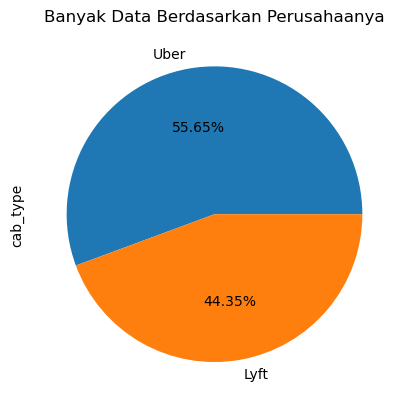

In [653]:
# Melakukan pembuatan plot untuk menampilkan pie chart yang menampilkan perbandingan data berdasarkan nama perushaan ('cab_type')
fig,ax1 = plt.subplots()

# Menghitung frekuensi masing-masing 'cab_type' menggunakan value_counts()
data['cab_type'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)

# Menambahkan judul pada pie chart
plt.title("Banyak Data Berdasarkan Perusahaanya")

# Menampilkan pie chart
plt.show()

Dari hasil visualisasi diatas, kita menadapati bahwa data dari `Uber (51.82%)` jauh lebih banyak dibanding `Lyft (48.18%)`.

Banyak data Uber yang diperlihatkan pada pie chart diatas `termasuk data-data dengan null values (data Uber tipe Taxi)`.

### **4.5. Melihat perbandingan harga setiap jenis armada dari masing-masing perusahaan**

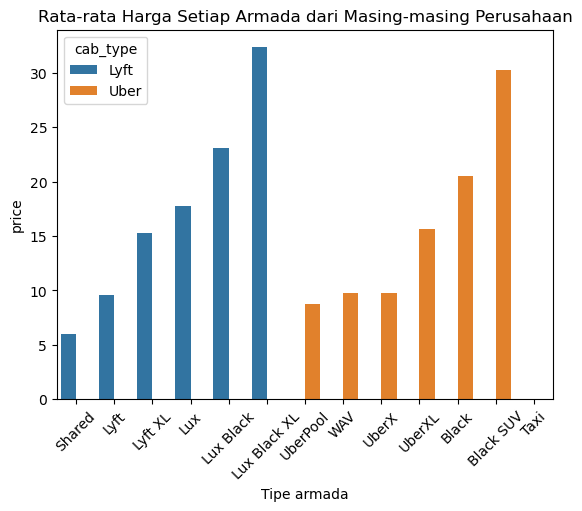

In [654]:
# Mengelompokkan data dan menghitung rata-rata harga ('price') untuk setiap kombinasi 'cab_type' dan 'name'
harga_setiap_armada = data.groupby(['cab_type', 'name'])['price'].mean().reset_index().sort_values(by=["cab_type", "price"], ascending=True)

# Membuat bar plot menggunakan seaborn untuk memvisualisasikan rata-rata harga per armada, dengan warna berbeda untuk setiap 'cab_type'
ax = sns.barplot(data=harga_setiap_armada, x='name', y='price', orient='v', hue='cab_type')

# Mengatur rotasi label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menambahkan judul pada plot
plt.title("Rata-rata Harga Setiap Armada dari Masing-masing Perusahaan")
plt.xlabel("Tipe armada")

# Menampilkan plot
plt.show()

Dari hasil visualisasi kita bisa lihat bahwa `Lyft memiliki 6 jenis layanan (Shared, Lyft, Lyft XL, Lux, Lux Black, Lux Black XL)` dan `Uber memiliki 6 jenis layanan yaitu (UberPool, WAV, UberX, UberXL, Black, Black SUV, Taxi)`.

Dari Perushaan `Lyft, layanan termurah adalah Shared dan yang termahal adalah Lux Black`. Sedangkan dari `Uber, layanan termurahnya adalah UberPool dan Black SUV`.

Dari visualisasi diatas, kita temukan bahwa `aramda Taxi dari Uber tidak ada datanya karena seperti pengecekan sebelumnya, kita mengetahui bahwa semua data Taxi memiliki data price yang kosong`.

Jenis armada atau service yang disediakan oleh `Lyft memiliki vairasi harga yang lebih bervariatif untuk setiap jenisnya`. Sedangkan `Uber variasi harganya tidak begitu beragam` yang dapat dilihat dari tiga jenis armadanya yaitu UberPool, WAV, dan UberX.

### **4.6. Melihat distribusi data Price**

Karena price menjadi data yang menjadi fokus prediksi kita, maka kita perlu melihat distribusi datanya secara lebih lanjut.

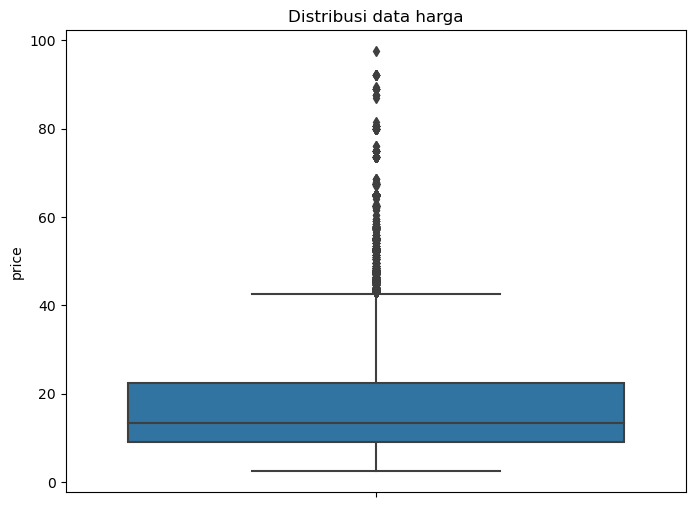

In [655]:
# Membuat figure dengan ukuran 8x6
plt.figure(figsize=(8, 6))

# Membuat boxplot menggunakan seaborn untuk memvisualisasikan distribusi harga ('price') berdasarkan 'cab_type'
sns.boxplot(y='price', data=data)

# Menambahkan judul pada boxplot
plt.title('Distribusi data harga')

# Menampilkan boxplot
plt.show()

In [656]:
# Menampilkan nilai harga termahal (dari kolom 'price')
data['price'].max()

97.5

In [657]:
# Menghitung kuartil bawah (q1) dan kuartil atas (q3) dari kolom 'price'
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)

# Menghitung rentang interquartile (IQR)
iqr = q3 - q1

# Menghitung batas atas (upper_bound) dan batas bawah (lower_bound) untuk deteksi outlier
batas_atas = q3 + 1.5 * iqr
batas_bawah = q1 - 1.5 * iqr

# Menampilkan hasil deteksi outlier
print(f'Batas Atas: {batas_atas:.2f}')
print(f'Batas Bawah: {batas_bawah:.2f}')


Batas Atas: 42.75
Batas Bawah: -11.25


Dari visualisasi diatas, kita temukan bahwa `mayoritas outliers ditemukan di batas atas dimana dimulai dari 42.75`.

Nilai teratas `outlier` mendekati 100 yaitu `97.5` dengan batas bawah outliernya adalah `-11.25`.

Dilihat dari pembagian berdasar quartir (q1, q2, dan q3), kita temukan bahwa distribusi nya tidak merata, dimana terdapat outlier yang sangat jauh pada batas atasnya dan q3 terlihat sangat luas.

### **4.7. Melihat perbandingan harga per hari dalam setiap bulannya**

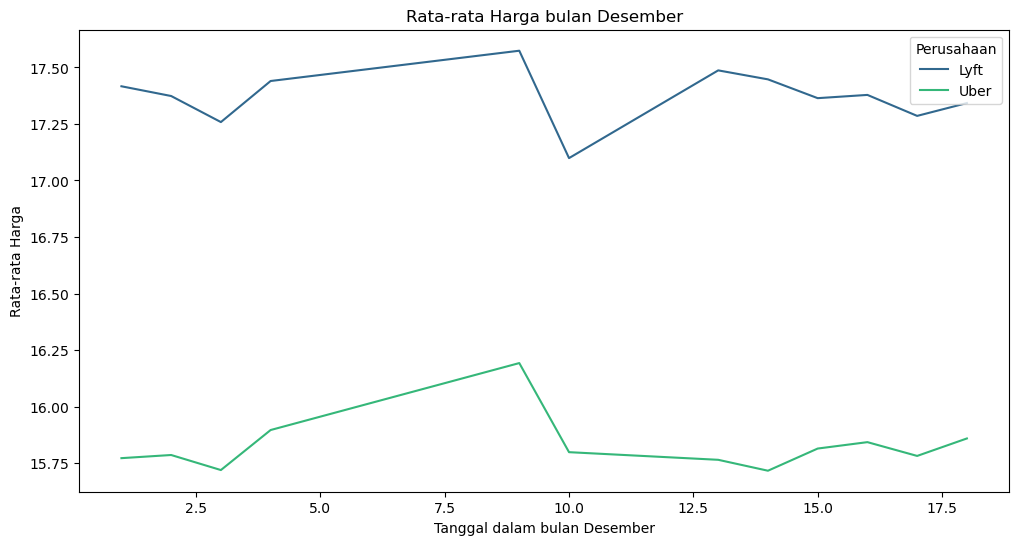

In [658]:
# Filter data untuk bulan tertentu yaitu Desember
df_filtered = data[data['month'] == 12]

# Mengelompokkan data berdasarkan "day" dan "cab_type" serta menghitung rata-rata harga
price_by_day_cab = df_filtered.groupby(['day', 'cab_type'])['price'].mean().reset_index()

# Membuat patokan ukuran figure/ visualisasi
plt.figure(figsize=(12,6))

# Membuat visualisasi menggunakan seaborn lineplot
sns.lineplot(data=price_by_day_cab, x='day', y='price', hue='cab_type', palette='viridis')

# Menambahkan judul pada plot
plt.title('Rata-rata Harga bulan Desember')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Tanggal dalam bulan Desember')
plt.ylabel('Rata-rata Harga')

# Menambahkan legenda di sudut kanan atas
plt.legend(title='Perusahaan', loc='upper right')

# Menampilkan plot
plt.show()

Dari visualisasi di atas, kita menemukan adanya perbedaan tren rata-rata harga dari kedua perusahaan tersebut.

Harga dari `Lyft lebih mahal dibandingkan Uber dengan selisih hingga US$2`.

Dari tanggal 1 hingga 10, kedua perushaan mengalami tren yang kurang lebih sama. Namun dari tanggal 10 hingga seterusnya, Lyft mendapatkan rata-rata harga yang lebih tinggi dibandingkan dengan Uber

### **4.8. Melihat banyaknya transaksi perjalanan terjadi berdasarkan titik awal dan akhir**

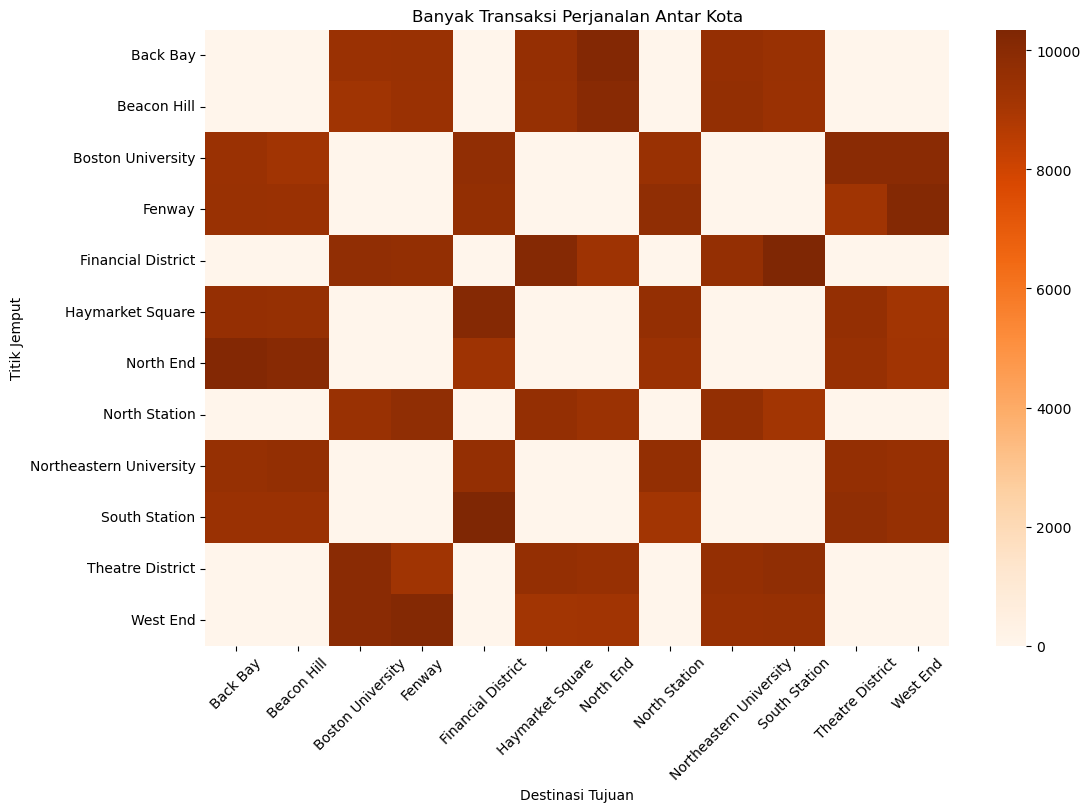

In [659]:
transition_matrix = pd.crosstab(data["source"], data["destination"])
plt.figure(figsize=(12,8))
sns.heatmap(transition_matrix, fmt='d', cmap="Oranges")
plt.ylabel("Titik Jemput")
plt.xlabel("Destinasi Tujuan")
plt.xticks(rotation=45)
plt.title("Banyak Transaksi Perjanalan Antar Kota")
plt.show()

Visualisasi diatas menggambarkan banyaknya transaksi perjalanan yang dilakukan antar kota-kota tertentu.

Dari visualisasi diatas, kita dapat melihat bahwa jenis perjalanan antar lokasi yang paling banyak dilakukan oleh customer adalah:
- Back Bay menuju North End
- Financial District menuju Haymarket Square
- Financial District menuju South Station
- Haymarket menuju Financial District
- North End menuju Back Bay
- South Station menuju Financial District
- West End menuju Fenway

`Financial District menjadi salah satu tempat yang memiliki banyak transaksi perjalanan` baik dari ataupun menuju Financial District.

### **4.9. Melihat korelasi data-data waktu terhadap harga**

Untuk melakukan uji korelasi data-data waktu terhadap harga (price), kita harus `memastikan tipe datanya terlebih dahulu`.

Data-data yang berakitan dengan waktu yang akan kita gunakan adalah `hour, day, month`.

Ketiga data ini memiliki tipe data integer.

Alasan dari kenapa `data sejenis lainnya seperti timestamp dan datetime tidak digunakan adalah karena ketiga data terpilih sudah mewakiliki` data-data ini.

Berikut pengujiannya:

In [660]:
data[['timestamp', 'hour', 'day', 'month', 'datetime']].sample(10)

,timestamp,hour,day,month,datetime
611094,1.544697e+09,10,13,12,2018-12-13 10:25:10
216127,1.543411e+09,13,28,11,2018-11-28 13:23:08
613985,1.543361e+09,23,27,11,2018-11-27 23:15:22
333688,1.545064e+09,16,17,12,2018-12-17 16:25:04
195555,1.545074e+09,19,17,12,2018-12-17 19:05:13
691522,1.544737e+09,21,13,12,2018-12-13 21:35:15
374400,1.545130e+09,10,18,12,2018-12-18 10:50:13
108661,1.543313e+09,10,27,11,2018-11-27 10:06:22
368859,1.543351e+09,20,27,11,2018-11-27 20:33:22
19148,1.544833e+09,0,15,12,2018-12-15 00:20:12


Metode uji korelasi yang digunakan adalah `metode kendall`.

Metode kendall digunakan karena `tidak sensitif terhadap outliers dan distribusi data` sehingga cocok untuk digunakan pada kasus ini.

Berikut adalah uji korelasi beserta visualisasinya:

c:\Users\Michael Nathaniel\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<Axes: >

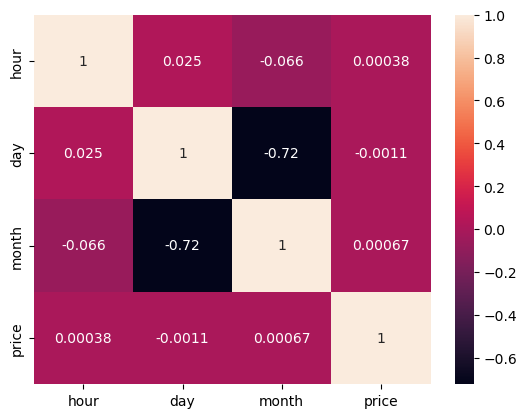

In [661]:
# Memilih kolom yang akan digunakan untuk analisis korelasi waktu dengan harga
data_waktu = data[['hour', 'day', 'month', 'price']]

# Membuat heatmap untuk memvisualisasikan korelasi
sns.heatmap(data_waktu.corr(method='kendall'),annot=True)

Dari hasil visualisasi diatas, kita mendapati bahwa semua data-data mengenai waktu (hour, day, month) yang kita gunakan dalam pengujian kali ini `tidak memiliki korelasi terhadap harga`. Hasil ini terlihat dari `nilai korelasinya yang tidak sampai 0.1` (dianggap 0).

### **4.10. Melihat korelasi data-data lokasi terhadap harga**

Untuk melakukan uji korelasi data-data lokasi terhadap harga (price), kita harus `memastikan tipe datanya terlebih dahulu`.

Data-data yang berakitan dengan waktu yang akan kita gunakan adalah `source, destination, distance, longitude, latitude`.

Tipe data yang digunakan terdiri dari dua jenis yang berbeda, yaitu kategori (source dan destionation) dan numerical (distance, longitude, dan latitude).

Metode uji korelasi yang digunakan adalah `metode PhiX`.

Metode PhiX digunakan karena `memungkinkan kita untuk menguji dua jenis data yang berbeda (categorical dan numerical)` sehingga cocok untuk digunakan pada kasus ini.

Berikut adalah uji korelasi beserta visualisasinya:

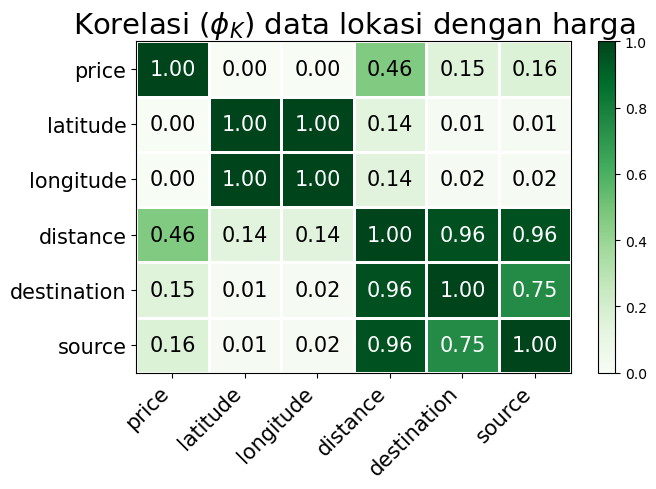

In [662]:
# Memilih kolom yang akan digunakan untuk analisis korelasi lokasi dengan harga
data_lokasi = data[['source', 'destination', 'distance', 'longitude', 'latitude', 'price']]

# Menentukan kolom interval untuk perhitungan matriks phik
interval_cols = ['price']

# Menghitung matriks phik untuk korelasi variabel kategorikal dan numerikal
phik_overview = data_lokasi.phik_matrix(interval_cols=interval_cols)

# Membuat visualisasi matriks korelasi dengan plot_correlation_matrix
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"Korelasi ($\phi_K$) data lokasi dengan harga",
                        fontsize_factor=1.5)

# Mengatur rotasi dan posisi label sumbu x
plt.xticks(rotation=45, ha='right')

# Mengatur tata letak agar plot terlihat rapi
plt.tight_layout()

Dari visualisasi diatas, dapat kita lihat bahwa variabel yang memiliki `korelasi dengan harga (price) adalah distance (0.46), destination (0.15), dan source (0.16)`.

Variabel `longitude dan latitude tidak memiliki korelasi` dengan price dimana nilai korelasinya hanya 0.

Dibandingankan dengan destination dan source, `distace memiliki korelasi yang paling tinggi` dari ketiganya.

### **4.11. Melihat korelasi data-data tipe armada (service) terhadap harga**

Untuk melakukan uji korelasi data tipe-tipe armada terhadap harga (price), kita harus `memastikan tipe datanya terlebih dahulu`.

Data-data yang berakitan dengan waktu yang akan kita gunakan adalah `cab_type, product_id, name, surge_multiplier`.

Tipe data yang digunakan terdiri dari dua jenis yang berbeda, yaitu kategori (cab_type, product_id, dan name) dan numerical (surge_multiplier).

Metode uji korelasi yang digunakan adalah `metode PhiX`.

Metode PhiX digunakan karena `memungkinkan kita untuk menguji dua jenis data yang berbeda (categorical dan numerical)` sehingga cocok untuk digunakan pada kasus ini.

Berikut adalah uji korelasi beserta visualisasinya:

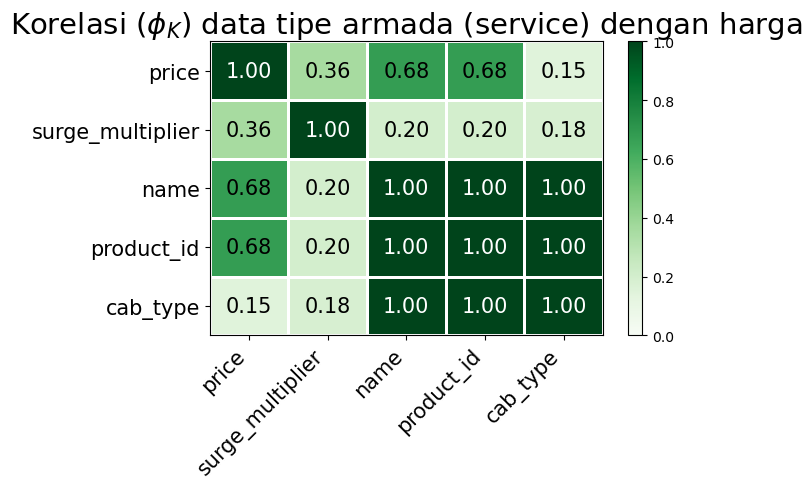

In [663]:
# Memilih kolom yang akan digunakan untuk analisis korelasi lokasi dengan harga
data_lokasi = data[['cab_type', 'product_id', 'name', 'surge_multiplier', 'price']]

# Menentukan kolom interval untuk perhitungan matriks phik
interval_cols = ['price']

# Menghitung matriks phik untuk korelasi variabel kategorikal dan numerikal
phik_overview = data_lokasi.phik_matrix(interval_cols=interval_cols)

# Membuat visualisasi matriks korelasi dengan plot_correlation_matrix
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"Korelasi ($\phi_K$) data tipe armada (service) dengan harga",
                        fontsize_factor=1.5)

# Mengatur rotasi dan posisi label sumbu x
plt.xticks(rotation=45, ha='right')

# Mengatur tata letak agar plot terlihat rapi
plt.tight_layout()

Dari hasil visualisasi diatas, kita mendapati bahwa `semua data yang kita uji (surge_multiplier, name, product_id, cab_type) memiliki korelasi terhadap harga`.

Peringkat korelasi dari tinggi ke rendah adalah `name dan product_id (0.68), surge_multiplier (0.36), dan cab_type (0.15)`.

Nilai korelasi name dan product_id bernilai sama yaitu 0.68.

Hal ini menunjukkan `adanya redudansi yang juga dibuktikan dari product_id dan name yang saling mewakili`.

Berikut adalah pembuktiannya:

In [664]:
data[['product_id', 'name']].sample(20)

,product_id,name
306155,lyft_plus,Lyft XL
604781,lyft,Lyft
53270,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
522298,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool
454940,lyft_luxsuv,Lux Black XL
425019,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
38963,lyft_plus,Lyft XL
672179,lyft,Lyft
235550,lyft_lux,Lux Black
69943,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX


### **4.12. Melihat korelasi data kondisi lingkungan terhadap harga**

Untuk melakukan uji korelasi data kondisi lingkungan terhadap harga (price), kita harus `memastikan tipe datanya terlebih dahulu`.

Data-data yang berakitan dengan waktu yang akan kita gunakan adalah `temperature, apparentTemperature, short_summary, long_summary, precipIntensity, precipProbability, humitidty, winpeed, dan price`.
dS
Tipe data yang digunakan terdiri dari dua jenis yang berbeda, yaitu kategori (temperature, apparentTemperature, precipIntensity, precipProbability, humitidty,dan winpeed) dan numerical (short_summary dan long_summary).

Metode uji korelasi yang digunakan adalah `metode PhiX`.

Metode PhiX digunakan karena `memungkinkan kita untuk menguji dua jenis data yang berbeda (categorical dan numerical)` sehingga cocok untuk digunakan pada kasus ini.

Berikut adalah uji korelasi beserta visualisasinya:

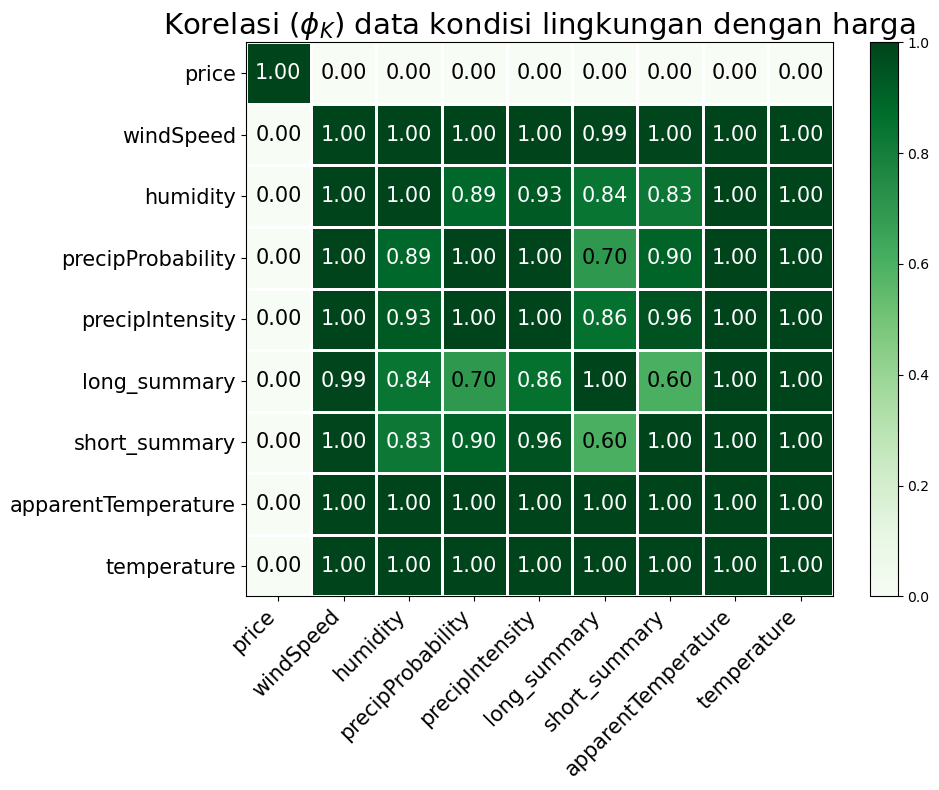

In [665]:
# Memilih kolom yang akan digunakan untuk analisis korelasi lokasi dengan harga
data_lokasi = data[['temperature', 'apparentTemperature', 'short_summary', 'long_summary',
                    'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'price']]

# Menentukan kolom interval untuk perhitungan matriks phik
interval_cols = ['price']

# Menghitung matriks phik untuk korelasi variabel kategorikal dan numerikal
phik_overview = data_lokasi.phik_matrix(interval_cols=interval_cols)

# Membuat visualisasi matriks korelasi dengan plot_correlation_matrix
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"Korelasi ($\phi_K$) data kondisi lingkungan dengan harga",
                        fontsize_factor=1.5,
                        figsize=(10, 8))

# Mengatur rotasi dan posisi label sumbu x
plt.xticks(rotation=45, ha='right')

# Mengatur tata letak agar plot terlihat rapi
plt.tight_layout()

Dari hasil visualisasi, kita memperoleh `seluruh variabel mengenai kondisi lingkungan tidak memiliki korelasi sama sekali terhadap harga`.

Oleh karena itu, kita tidak akan menghiraukan data mengenai cuaca dan kondisi.

### **4.13. Melihat distribusi data numerical**

Kita akan melihat distribusi data dari setiap data numerical menggunakan visualisasi berbentuk boxplot.

Dengan boxplot, kita bisa melihat secara kasar data apa saja yang memiliki ouliers.

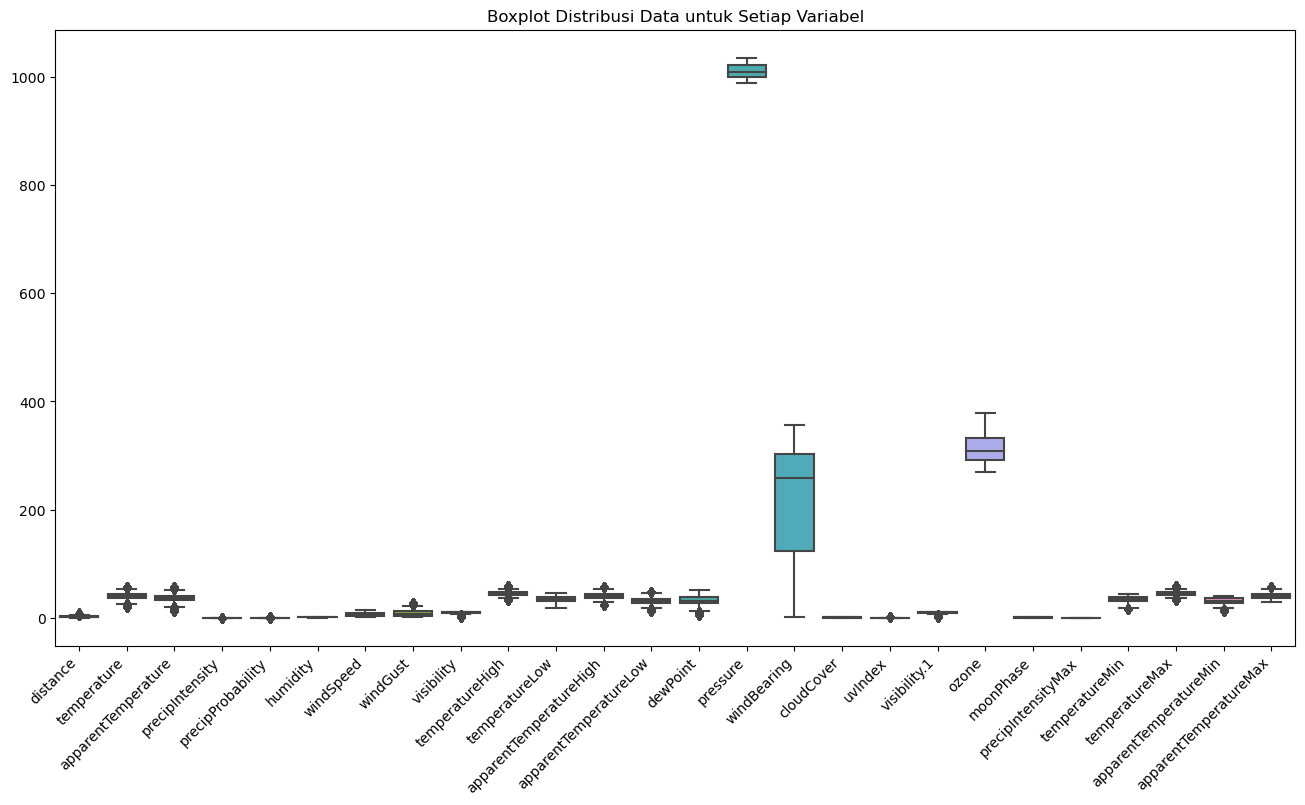

In [666]:
# Mengatur ukuran gambar
plt.figure(figsize=(16, 8))

# Membuat boxplot untuk setiap variabel numerik
sns.boxplot(data=data_numeric_only)
plt.title('Boxplot Distribusi Data untuk Setiap Variabel')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x untuk lebih mudah dibaca
plt.show()

Dari visualisasi diatas, kita bisa melihat bahwa `mayoritas data numerical yang kita miliki memiliki outliers`.

### **4.14. Melihat distribusi data kategori**

Kita akan melihat distribusi data dari setiap data numerical menggunakan visualisasi berbentuk boxplot.

Dengan boxplot, kita bisa melihat secara kasar data apa saja yang memiliki ouliers.

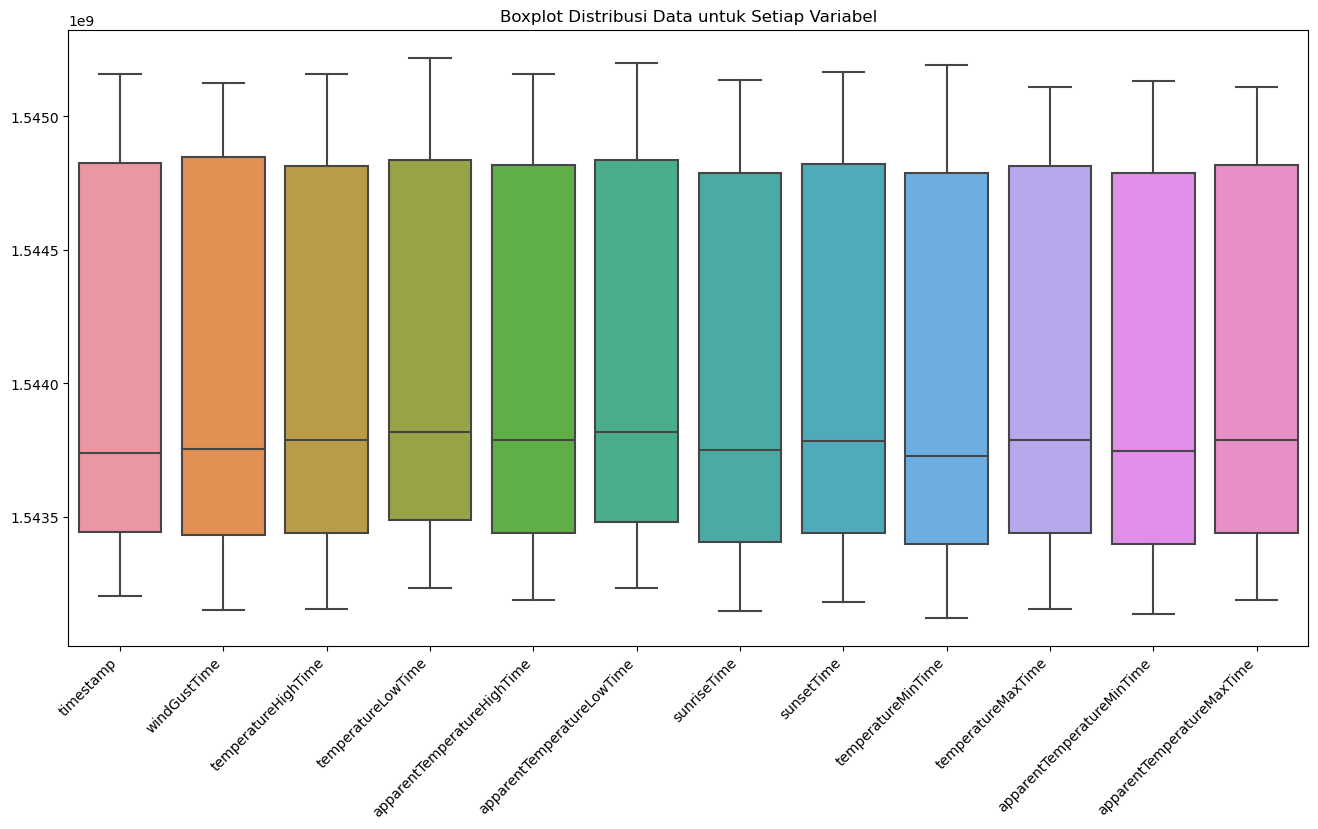

In [667]:
# Mengatur ukuran gambar
plt.figure(figsize=(16, 8))

# Membuat boxplot untuk setiap variabel time
sns.boxplot(data=data_time_only)
plt.title('Boxplot Distribusi Data untuk Setiap Variabel')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x untuk lebih mudah dibaca
plt.show()

Dari visualisasi diatas, kita menemukan bahwa `semua data time-related tidak memiliki outliers`.

### **4.15. Assumption 1 : Linear Relationship**

Dalam membuat model linear regression, penting untuk memastikan bagaimana hubungan variabel terikat dan variabel bebas.

Hubungan kedua variabel tersebut harus memiliki bentuk linear atau dapat menyatakan bahwa perubahan y (target) di pengaruhi oleh perubahan x (fitur) dan bersifat konstan.

Jika tidak, maka ada kemungkinan algoritma linear regresi untuk gagal.

Kita dapat mengeceknya dengan membuat scatter plot.

Mula-mula, kita buat Data Frame baru berdasarkan hasil uji korelasi menggunakan phix dan kendall yang sebelumnya sudah kita lakukan.

In [668]:
# Memilih kolom-kolom tertentu dari DataFrame 'data' untuk analisis Linear Relationship
data_selected_after_eda = data[['distance', 'destination', 'source', 'surge_multiplier', 'name', 'product_id', 'cab_type', 'price']]

# Memilih kolom-kolom numerik tertentu untuk analisis lebih lanjut
data_selected_after_eda_numeric_only = data[['distance', 'surge_multiplier', 'price']]

Untuk membuat plot untuk pengecekan Linear Relationship, kolom-kolom pada Data Frame yang kita gunakan harus berbentuk numerical.

Jika sudah, kita akan memisahkan data yang akan menjadi target (X) dan yang menjadi fitur (y).

In [669]:
# Splitting between `X` and `y`

# Memisahkan variabel independen (fitur) dan variabel dependen (target)
X = data_selected_after_eda_numeric_only.drop(['price'], axis=1)
y = data_selected_after_eda_numeric_only['price']

# Menampilkan variabel independen (fitur) `X`
X

,distance,surge_multiplier
0,0.44,1.0
1,0.44,1.0
2,0.44,1.0
3,0.44,1.0
4,0.44,1.0
...,...,...
693066,1.00,1.0
693067,1.00,1.0
693068,1.00,1.0
693069,1.00,1.0


Setelah memisahkan data menjadi X dan y, kita akan melakukan visualisasi menggunakan scatter plot.

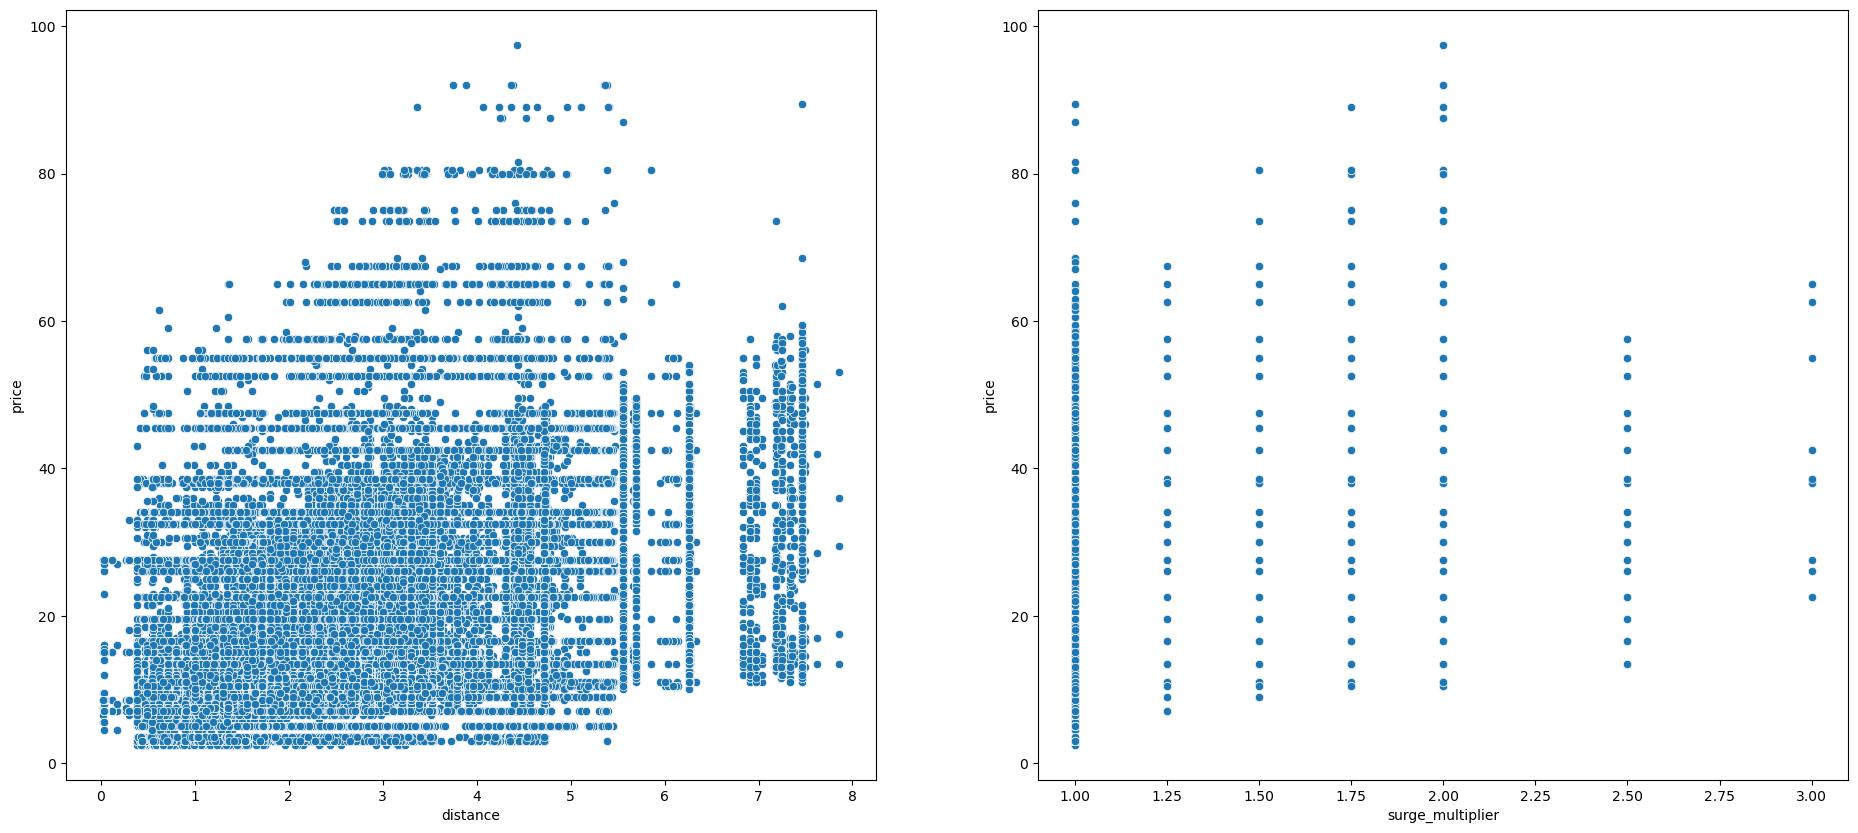

In [670]:
# Check the relationship between independent variables and dependent variable

# Membuat figur dengan ukuran tertentu
fig = plt.figure(figsize=(23, 10))

# Mendapatkan nama-nama kolom dari variabel independen
cols = X.columns.tolist()

# Menentukan jumlah baris dan kolom untuk subplot
num_rows = 1
num_cols = 2

# Looping untuk membuat scatter plot untuk setiap variabel independen
for index in range(1, num_rows*num_cols + 1):
  # Menambahkan subplot ke figur
  fig.add_subplot(num_rows, num_cols, index)
  
  # Membuat scatter plot menggunakan seaborn
  sns.scatterplot(data=data, x=cols[index-1], y='price')

# Menampilkan plot
plt.show()

Dari hasil visualisasi menggunakan scatter plot, terlihat bahwa:
- figur kiri menampilkan korelasi price dengan distance. Terlihat bahwa `adanya korelasi linear positif antara price dengan distance`. Dari hasil ini, kita dapat menggunakan data distance sebagai fitur untuk model.
- figur kanan menampilkan korelasi price dengan surge_multiplier. `Tidak terlihat adanya korelasi linear positif antara price dengan surge_multiplier`. Namun bedasarkan personal judgement dan business domain knowledege, `surge multiplier digunakan sebagai penambahan harga pada kondisi tertentu seperti jam sibuk, macet, dan sejenisnya sehingga data surge_multiplier akan tetap kita gunakan`.

### **4.16. Assumption 2 : No or Little Multicollinearity**

Multikolinearitas/ Multicollinearity adalah fenomena ketika sejumlah variabel independen berkorelasi kuat.

Untuk mengahsilkan model yang baik dan menghasilkan hasil prediksi yang maksimal, selain dari korelasi independe dengan dependen harus kuat, korelasi antar independen haruslah tidak ada atau hanya sedikit.

Hal ini penting karena kita akan mencari tahu variabel/ fitur apa yang mengakibatkan atau bertanggung jawab terhadap perubahan variabel dependen.

In [671]:
# Buat fungsi untuk menghitung VIF untuk sekelompok variabel independen
def calc_vif(X):
    # Buat DataFrame kosong untuk menyimpan nama variabel dan nilai VIF-nya
    vif = pd.DataFrame()
    
    # Tambahkan kolom ke DataFrame untuk nama variabel
    vif["variabel"] = X.columns
    
    # Hitung nilai VIF untuk setiap variabel dan simpan dalam kolom 'VIF'
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Kembalikan DataFrame dengan nama variabel dan nilai VIF-nya
    return(vif)

In [672]:
# Check Multicolinearity in X

calc_vif(X)

,variabel,VIF
0,distance,4.597022
1,surge_multiplier,4.597022


Dari hasil pengecekan Multicollinearity menggunakan VIF, baik variabel distance ataupun surge_multiplier memiliki nilai VIF dibawah 10.

Artinya, `variabel distance dan surge_multiplier tersebut tidak memiliki Multicollinearity`.

### **4.5. Kesimpulan**

Setelah melalui proses EDA, kita memperoleh informasi sebagai berikut:
- Data mengenai Uber lebih banyak dari pada Lyft.
- Rata-rata harga armada Lyft lebih mahal daripada Uber.
- Lyft memiliki harga yang lebih bervariatif untuk berbagai segmentasi aramda dibanding Uber.
- Untuk bulan Desember, Lyft memiliki tren rata-rata harga yang lebih baik daripada Uber.
- Financial District menjadi salah satu tempat yang memiliki banyak transaksi perjalanan baik dari ataupun menuju Financial District.
- Data-data mengenai waktu tidak memiliki korelasi sama sekali dengan perubahan harga.
- Data-data mengenai lokasi seperti distance, destination, dan source memiliki korelasi dengan perubahan harga dimana distance menjadi variabel dengan korelasi tertinggi diantara ketiganya.
- Data-data mengenai armada seperti surge_multiplier, name, product_id, dan cab_type memiliki korelasi dengan perubahan harga.
- Data-data mengenai kondisi cuaca tidak memiliki korelasi sama sekali dengan perubahan harga.
- Mayoritas data numerical non waktu memiliki outlier.
- Mayoritas data mengenai waktu tidak memiliki outlier

Dari keseluruhan proses EDA, `data-data yang kita perlukan dalam membuat model linear regression untuk prediksi harga adalah jarak (distance), lonjakan kelipatan harga (surge_multiplier), tipe service (name), dan harga (price)`.

Variabel destionation dan source tidak digunakan karena meskipun memiliki korelasi, nilai korelasinya kecil dan secara tidak langsung sudah diwakili oleh distance.

Karena name dan product_id saling mewakili, kita akan memilih salah satunya yaitu name.

Kita tidak menggunakan cab_type karena meskipun memiliki korelasi terhadap price, kita tidak akan menggunakannya karena nilai korelasinya kecil, dan secara tidak langsung tipe serivce (name) sudah mewakili tipe perushaan (cab_type).

In [673]:
# Membuat data frame baru khusus untuk feature engineering
data_feature_engineering = data[['distance', 'surge_multiplier', 'name', 'price']]

---
## **5. Feature Engineering**

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### **5.1. Hadling Outliers**

Untuk mendapatkan hasil dari akurat prediksi mengunakan model linear regresi, tentu kita harus mengolah data yang akan dijadikan data training terlebih dahulu.

Kita bisa memulai dengan uji deteksi outliers.

##### **5.1.1. Data Load**

Pertama-tama, kita dapat melakukan data loading mengunakan .info() untuk melihat kembali data apa saja yang kita gunakan untuk model linear regresi.

In [674]:
data_feature_engineering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   surge_multiplier  693071 non-null  float64
 2   name              693071 non-null  object 
 3   price             637976 non-null  float64
dtypes: float64(3), object(1)
memory usage: 21.2+ MB


Dari method diatas, kita mengetahui bahwa kita akan menggunakan 4 kolom berbeda yaitu distance, surge_multiplier, name, dan price.

Selanjutnya kita akan lakukan uji outlier kepada seluruh data bersifat numerical dari dataset ini.

Uji outliers akan menggunakan Tukey's Rule mengingat penyebaran datanya tidak normal.

##### **5.1.2 Hadling Outliers: distance**

Lakukan uji Tukey's Rule kepada kolom distance.

In [675]:
q1 = data_feature_engineering['distance'].quantile(0.25)
q3 = data_feature_engineering['distance'].quantile(0.75)
iqr = q3-q1

batas_atas_distance = q3 + 1.5*iqr
batas_bawah_distance = q1 - 1.5*iqr

print(f'Batas Atas: {batas_atas_distance:.2f}' )
print(f'Batas Bawah: {batas_bawah_distance:.2f}')

data_feature_engineering_distance_outlier = data_feature_engineering['distance'][(data_feature_engineering['distance']<batas_bawah_distance) | (data_feature_engineering['distance']>batas_atas_distance)]
data_feature_engineering_distance_no_outlier = data_feature_engineering['distance'][(data_feature_engineering['distance']>=batas_bawah_distance) & (data_feature_engineering['distance']<=batas_atas_distance)]

print(f"Banyak outliers: {data_feature_engineering_distance_outlier.count()}")

Batas Atas: 5.38
Batas Bawah: -1.18
Banyak outliers: 8662


Dari hasil uji, kita temukan bahwa `pada data distance, batas atasnya adalah 5.38, batas bawahnya adalah -1.18, dan total outliernya adalah 8,662 dari total 693,071 data`.

##### **5.1.3 Hadling Outliers: surge_multiplier**

Lakukan uji Tukey's Rule kepada kolom surge_multiplier.

In [676]:
q1 = data_feature_engineering['surge_multiplier'].quantile(0.25)
q3 = data_feature_engineering['surge_multiplier'].quantile(0.75)
iqr = q3-q1

batas_atas_surge_multiplier = q3 + 1.5*iqr
batas_bawah_surge_multiplier = q1 - 1.5*iqr

print(f'Batas Atas: {batas_atas_surge_multiplier:.2f}' )
print(f'Batas Bawah: {batas_bawah_surge_multiplier:.2f}')

data_feature_engineering_surge_multiplier_outlier = data_feature_engineering['surge_multiplier'][(data_feature_engineering['surge_multiplier']<batas_bawah_surge_multiplier) | (data_feature_engineering['surge_multiplier']>batas_atas_surge_multiplier)]
data_feature_engineering_surge_multiplier_no_outlier = data_feature_engineering['surge_multiplier'][(data_feature_engineering['surge_multiplier']>=batas_bawah_surge_multiplier) & (data_feature_engineering['surge_multiplier']<=batas_atas_surge_multiplier)]

print(f"Banyak outliers: {data_feature_engineering_surge_multiplier_outlier.count()}")

Batas Atas: 1.00
Batas Bawah: 1.00
Banyak outliers: 20975


Dari hasil uji, kita temukan bahwa `pada data surge_multiplier, batas atasnya adalah 1.00, batas bawahnya adalah 1.00, dan total outliernya adalah 20,975 dari total 693,071 data`.

##### **5.1.4 Hadling Outliers: price**

Lakukan uji Tukey's Rule kepada kolom price.

In [677]:
q1 = data_feature_engineering['price'].quantile(0.25)
q3 = data_feature_engineering['price'].quantile(0.75)
iqr = q3-q1

batas_atas_price = q3 + 1.5*iqr
batas_bawah_price = q1 - 1.5*iqr

print(f'Batas Atas: {batas_atas_price:.2f}' )
print(f'Batas Bawah: {batas_bawah_price:.2f}')

data_feature_engineering_outlier = data_feature_engineering['price'][(data_feature_engineering['price']<batas_bawah_price) | (data_feature_engineering['price']>batas_atas_price)]
data_feature_engineering_no_outlier = data_feature_engineering['price'][(data_feature_engineering['price']>=batas_bawah_price) & (data_feature_engineering['price']<=batas_atas_price)]

print(f"Banyak outliers: {data_feature_engineering_outlier.count()}")

Batas Atas: 42.75
Batas Bawah: -11.25
Banyak outliers: 5589


Dari hasil uji, kita temukan bahwa `pada data surge_multiplier, batas atasnya adalah 42.75, batas bawahnya adalah -11.25, dan total outliernya adalah 5,589 dari total 637,976 data`.

##### **5.1.5. Kesimpulan Handling Outlier**

Dari ketiganya, kita temukan adanya outliers pada masing-masing kolom.

Namun kita tidak akan menghandle outliers pada ketiga kolom teresebut.

Alasan dari tidak mengahndle outliers adalah:
- `Outliers pada price merupakan natural outliers` (biaya perjalanan bervariasi).
- `Outliers pada surge_multiplier merupakan natural outliers`.
- `Outliers pada distance merupakan natural outliers` (jarak perjalanan bervariasi dan dianggap kondisi nyata dan masuk akal)

### **5.2. Handling Missing Value**

Untuk memperoleh hasil prediksi dengan tingkat akurasi maksimal, kita akan melakukan pengecekan terhadap data null yang kemudian akan dihandling bila ditemukan.

Kita dapat memulai handling missing value dengan `menghitung banyaknya row kosong pada setiap kolom menggunakan method .isnull().sum()`.

In [678]:
data_feature_engineering.isnull().sum()

distance                0
surge_multiplier        0
name                    0
price               55095
dtype: int64

Dari syntax diatas, kita temukan bahwa hanya ada satu kolom yang memiliki null values yaitu `kolom price` dengan 55,095 data kosong.

Selanjutnya kita akan melihat data apa saja yang memiliki null values pada kolom price.

In [679]:
data_feature_engineering_null_only = data_feature_engineering[data_feature_engineering['price'].isnull()]
data_feature_engineering_null_only

,distance,surge_multiplier,name,price
18,1.11,1.0,Taxi,NaN
31,2.48,1.0,Taxi,NaN
40,2.94,1.0,Taxi,NaN
60,1.16,1.0,Taxi,NaN
69,2.67,1.0,Taxi,NaN
...,...,...,...,...
693025,2.50,1.0,Taxi,NaN
693047,0.91,1.0,Taxi,NaN
693049,1.79,1.0,Taxi,NaN
693060,1.61,1.0,Taxi,NaN


In [680]:
data_feature_engineering_null_only['name'].unique()

array(['Taxi'], dtype=object)

In [681]:
data_feature_engineering_null_only['surge_multiplier'].unique()

array([1.])

Kita temukan bahwa data-data yang memiliki null values pada kolom price adalah data dengan tipe armada Taxi dari perusahaan Uber.

Selanjutnya, kita akan melakukan pengahpusan data-data yang kosong atau null menggunakan method .dropna()

Kita bisa langsung menghapusnya karena tidak akan memberikan dampak yang besar terhadap prediksi berdasarkan variabel lainnya.

In [682]:
data_feature_engineering = data_feature_engineering.dropna()

Kemudian kita akan mengecek kembali menggunakan method .insull().sum()

In [683]:
data_feature_engineering.isnull().sum()

distance            0
surge_multiplier    0
name                0
price               0
dtype: int64

Setelah melakukan pengecek, kita lihat sudah tidak ada lagi data yang mengandung null values.

### **5.3. Feature Data Splitting**

##### **5.3.1. Split menjadi X (features) and y (target)**

Untuk membuat model machine learning, kita perlu membagi data menjadi dua bagian yaitu yang ingin kita prediksi/ target (y) dan yang untuk memprediksi/ fitur (X)

In [684]:
# Splitting between X and y

# Memisahkan variabel independen (fitur) dan variabel dependen (target)
X = data_feature_engineering.drop(['price'], axis=1)
y = data_feature_engineering['price']

In [685]:
# Menampilkan variabel independen (fitur) X
X

,distance,surge_multiplier,name
0,0.44,1.0,Shared
1,0.44,1.0,Lux
2,0.44,1.0,Lyft
3,0.44,1.0,Lux Black XL
4,0.44,1.0,Lyft XL
...,...,...,...
693065,1.00,1.0,WAV
693066,1.00,1.0,UberXL
693067,1.00,1.0,UberX
693069,1.00,1.0,Black SUV


In [686]:
# Menampilkan variabel dependen (target) y
y

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693065     9.5
693066    13.0
693067     9.5
693069    27.0
693070    10.0
Name: price, Length: 637976, dtype: float64

##### **5.1.2. Split between Train-Set and Test-Set**

Kemudian setelah dipisah menjadi fitur (X) dan target (y), kita akan memisahkan kembali masing-masingnya menjadi data train (digunakan oleh model untuk belajar) dan data test (digunakan oleh model sebagai data uji/ test)

In [687]:
# Splitting between train and test

# Memisahkan data menjadi set pelatihan (train) dan set pengujian (test)
# Dengan rasio 80:20 dan seed (random_state) 46 untuk hasil yang dapat direproduksi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

# Menampilkan bentuk (shape) dari set pelatihan dan set pengujian
print('X-train', X_train.shape)
print('X-Test', X_test.shape)

X-train (510380, 3)
X-Test (127596, 3)


##### **5.1.3. Splitting between Numerical Columns and Categorical Columns**

Kita akan memisahkan data numerical dengan data categorical untuk kemudian dilakukan pemrosesan tahap selanjutnya seperti scaling (untuk numerical) dan encoding (untuk categorical).

Langkah pertama adalah memisahkan data numerical dengan categorial.

In [688]:
# Mendapatkan daftar kolom numerik
num_col = ['distance']  # Hanya satu kolom numerik, mungkin jarak atau panjang

# Mendapatkan daftar kolom kategorikal
cat_col = ['name', 'surge_multiplier']  # Dua kolom kategorikal: 'name' dan 'surge_multiplier'

Setelah terpisah dengan nama num_col untuk numerical dan cat_col untuk categorial, selanjutnya kita akan memisahkan masing-masing untuk data training dan testnya.

In [689]:
# Memisahkan data latih dan uji berdasarkan jenis kolom

# Data numerik untuk pelatihan
X_train_num = X_train[num_col]

# Data numerik untuk pengujian
X_test_num = X_test[num_col]

# Data kategorikal untuk pelatihan
X_train_cat = X_train[cat_col]

# Data kategorikal untuk pengujian
X_test_cat = X_test[cat_col]

### **5.3. Feature Scaling**

Data scaling adalah proses mengubah rentang nilai data agar dapat memiliki skala yang seragam.

Dalam Python, contoh metode yang sering digunakan adalah Min-Max Scaling atau Z-score Scaling untuk melakukan hal ini.

Dalam kasus kali ini, karena datanya memiliki banyak outlier dan distribusinya tidak rata, maka kita akan menggunakan metode Robust Scaler.

Robust Scaler bekerja dengan cara mengubah nilai-nilai data menggunakan median dan interquartile range (IQR) alih-alih menggunakan mean dan standard deviation seperti pada Z-score Scaling.

Kita akan melakukan Robust Scaler terhadap data numerical yaitu distance.

In [690]:
# Penskalaan fitur menggunakan RobustScaler

# Inisialisasi objek scaler
scaler = RobustScaler()

# Melatih scaler pada data numerik pelatihan
scaler.fit(X_train_num)

# Penskalaan data numerik pelatihan
X_train_num_scaled = scaler.transform(X_train_num)

# Penskalaan data numerik pengujian
X_test_num_scaled = scaler.transform(X_test_num)

# Tampilkan data numerik pelatihan setelah penskalaan
X_train_num_scaled


array([[-0.25454545],
       [ 0.61212121],
       [ 0.38787879],
       ...,
       [ 0.06666667],
       [ 0.53333333],
       [-0.14545455]])

Encoding adalah proses mengubah data menjadi bentuk yang dapat dipahami oleh mesin, terutama dalam konteks machine learning. Terdapat dua jenis encoding yang umum digunakan seperti Ordinal dan One-Hot-Encoding.

Encoding kali ini akan dilakukan kepada data name dan data surge_multiplier.

Kita akan menggunakan metode Ordinal dimana metode ini mengkodekan nilai kategori yang memiliki urutan atau tingkatan tertentu.

Cara kerja metode Ordinal adalah setiap nilai kategori diassign dengan bilangan bulat sesuai urutannya.

Data name atau armada type memiliki urutan yang dilihat berdasarakan rata-rata harga argonya. Sedangkan surge_multiplier menunjukkan tingkatan peningkatan harga berdasarkan faktor tertentu seperti tingkat kepadatan jalan, cuaca, dll.

Untuk memudahkan pengerjaan, kita dapat melakukan print dataset kita untuk melihat urutan penulisan kolom.

### **5.3. Feature Encoding**

In [691]:
# Tampilkan data kategorikal pelatihan
X_train_cat

,name,surge_multiplier
479238,Lux Black,1.0
640712,Shared,1.0
428507,UberXL,1.0
391728,Lux,1.0
688379,WAV,1.0
...,...,...
483102,Black SUV,1.0
91625,Black,1.0
631053,Lux Black XL,1.0
317483,Black SUV,1.0


Dari syntax diatas, kita temukan bahwa pada saat menuliskan kode untuk encode, kita akan menuliskan data name terlebih dahulu.

Setelah mengetahui urutan penulisan, selanjutnya kita bisa menampilkan urutan name atau tipe armada berdasarkan price-nya secara descending menggunakan method .sort_values().

In [692]:
# Mengurutkan harga setiap armada secara ascending
harga_setiap_armada.sort_values(by='price')

,cab_type,name,price
5,Lyft,Shared,6.029893
9,Uber,UberPool,8.752500
3,Lyft,Lyft,9.610885
12,Uber,WAV,9.765019
10,Uber,UberX,9.765074
4,Lyft,Lyft XL,15.309363
11,Uber,UberXL,15.678144
0,Lyft,Lux,17.771240
6,Uber,Black,20.523786
1,Lyft,Lux Black,23.062468


Selain itu, kita juga perlu mengetahui ada tipe apa saja data surge_multiplier.

Kita bisa mengeceknya dengan memanfaatkan method .unique().

In [693]:
# Menampilkan nilai unik dalam kolom 'surge_multiplier'
data['surge_multiplier'].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

Setelah semua informasi yang diperlukan terpenuhi, kita bisa langsung memulai tahap encoding ordinal.

In [694]:
# Encoding fitur menggunakan OrdinalEncoder

# Inisialisasi objek encoder dengan kategori yang ditentukan
encoder = OrdinalEncoder(categories=[['Shared', 'UberPool', 'Lyft', 'WAV', 'UberX',
                                      'Lyft XL', 'UberXL', 'Lux', 'Black', 'Lux Black',
                                      'Black SUV', 'Lux Black XL'],
                                     [1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3.0]])

# Melatih encoder pada data kategorikal pelatihan
encoder.fit(X_train_cat)

# Melakukan encoding pada data kategorikal pelatihan
X_train_cat_encoded = encoder.transform(X_train_cat)

# Melakukan encoding pada data kategorikal pengujian
X_test_cat_encoded = encoder.transform(X_test_cat)

# Tampilkan data kategorikal pelatihan setelah encoding
X_train_cat_encoded

array([[ 9.,  0.],
       [ 0.,  0.],
       [ 6.,  0.],
       ...,
       [11.,  0.],
       [10.,  0.],
       [ 1.,  0.]])

### **5.4. Feature Combine**

Setelah melakukan scaling dan encoding, kita akan menggabungkan data-data fitur numerical dan categorical baik untuk data train maupun data test.

In [695]:
# Menggabungkan kolom-kolom

# Menggabungkan data numerik dan data kategorikal yang telah diolah untuk pelatihan
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)

# Menggabungkan data numerik dan data kategorikal yang telah diolah untuk pengujian
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

# Tampilkan data gabungan pelatihan
X_train_final

array([[-0.25454545,  9.        ,  0.        ],
       [ 0.61212121,  0.        ,  0.        ],
       [ 0.38787879,  6.        ,  0.        ],
       ...,
       [ 0.06666667, 11.        ,  0.        ],
       [ 0.53333333, 10.        ,  0.        ],
       [-0.14545455,  1.        ,  0.        ]])

Setelah menggabungkan datanya, kita mendapatkan gabungannya dalam bentuk array.

Oleh karena itu, selanjutnya kita akan mengubahnya menjadi dataFrame.

In [696]:
# Membuat dataframe dari X_train final

# Membuat dataframe dari data gabungan pelatihan dengan nama kolom yang sesuai
X_train_final_df = pd.DataFrame(X_train_final, columns=num_col + cat_col)

# Tampilkan dataframe X_train final
X_train_final_df

,distance,name,surge_multiplier
0,-0.254545,9.0,0.0
1,0.612121,0.0,0.0
2,0.387879,6.0,0.0
3,0.539394,7.0,0.0
4,-0.242424,3.0,0.0
...,...,...,...
510375,1.357576,10.0,0.0
510376,-0.678788,8.0,0.0
510377,0.066667,11.0,0.0
510378,0.533333,10.0,0.0


---
## **6. Model Definition**

Karena kita akan melakukan prediksi terhadap price, kita akan menggunakan model linear regression.

`Linear Regression cocok digunakan ketika ada asumsi bahwa hubungan antara variabel input dan output adalah linier`. Dalam konteks harga transportasi, ada kemungkinan adanya hubungan linier antara fitur-fitur tertentu (seperti jarak tempuh, surge, dll) dengan harga argo.

Dalam hal ini, fiturnya adalah surge multiplier dan distance. Price menjadi target dari prediksi model ini.

In [697]:
# Mendefinisikan Model

# Inisialisasi objek model Linear Regression
model_lin_reg = LinearRegression()

---
## **7. Model Training**

Setelah proses menyiapkan data train, kita akan men-train model menggunakan data train kita.

In [698]:
# Melatih model menggunakan data Train
model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

Dalam Linear Regression terdapat Intercept dan Slope.

Intercept adalah titik potong garis regresi dengan sumbu vertikal (y) ketika semua variabel independen (x) diatur ke nilai 0.

Slope atau koefisien adalah kemiringan garis regresi, yang menunjukkan perubahan rata-rata dalam variabel dependen (y) untuk setiap perubahan satu unit dalam variabel independen (x).

Kita akan melakukan pengecekan intercept dan slope untuk memahami dan mengerti bagaimana model Linear Regression memodelkan hubungan antara variabel independen dan dependen.

In [699]:
# Mendapatkan Koefisien dan Intercept, serta Menampilkan dalam DataFrame

# Mendapatkan koefisien model dan intercept
coefficients = model_lin_reg.coef_
intercept = model_lin_reg.intercept_

# Membuat dictionary untuk parameter (fitur dan koefisien) 
params = {
    'feature': X_train.columns.tolist(),
    'coefficient': model_lin_reg.coef_.tolist()
}

# Menampilkan intercept
print('Intercept : ', intercept)

# Membuat DataFrame dari parameter
pd.DataFrame(params)

Intercept :  3.7363876985225737


,feature,coefficient
0,distance,4.616182
1,surge_multiplier,2.266870
2,name,4.518616


Dari syntax diatas kita peroleh `nilai interceptnya adalah 3.7363876985225737`. Nilai ini mewakili `biaya dasar atau biaya tetap yang muncul bahkan jika jarak dan faktor peningkatan (surge_multiplier) adalah nol`. Dengan kata lain, `nilai intercept bisa kita anggap sebagai argo awal`.

Koefisien untuk distance (4.616182) menunjukkan bahwa, pada rata-rata, `harga argo meningkat sekitar 4.62 unit untuk setiap unit peningkatan jarak`.

Koefisien untuk surge_multiplier (2.266870) menunjukkan bahwa, pada rata-rata, `harga argo meningkat sekitar 2.27 unit untuk setiap unit peningkatan faktor peningkatan`.

Koefisien untuk name (4.518616) menunjukkan bahwa, pada rata-rata, `harga argo meningkat sekitar 4.52 unit untuk setiap unit perubahan dalam nama pengemudi`.

---
## **8. Model Evaluation**

Setelah membentuk modelnya, kita akan mengevaluasi performa model. Kita dapat mengujinya dengan menggunakan Mean Absolute Error (MAE) dan r2 Score.

Pada function ini, yang kita ukur adalah selisih nilai prediksi dan nilai sebenarnya. Jika Error nya sama dengan nol berarti model yang dibangun mampu melakukan prediksi dengan sempurna.

Semakin kecil nilai MAE, semakin baik performa model, karena nilai absolut menunjukkan seberapa besar kesalahan prediksi tanpa memperhatikan arah kesalahan.

Nilai R2 yang tinggi menunjukkan bahwa model dapat menjelaskan sebagian besar variasi dalam data.

Sebelum itu, kita akan membuat y prediksi untuk data train dan data test.

In [700]:
# Memprediksi Data Latih dan Data Uji

# Memprediksi target untuk data latih menggunakan model
y_pred_train = model_lin_reg.predict(X_train_final)

# Memprediksi target untuk data uji menggunakan model
y_pred_test = model_lin_reg.predict(X_test_final)

Setelah membuat y_pred_test dan y_pred_train, kita akan langsung memulai proses evaluasi dimulai dengan MAE terlebih dahulu.

### **8.1. Mean Absolute Error (MAE)**

In [701]:
# Evaluasi Model menggunakan MAE

# Import modul mean_absolute_error dari sklearn.metrics
from sklearn.metrics import mean_absolute_error

# Menghitung dan menampilkan MAE untuk data latih
print('Error - Train set', mean_absolute_error(y_train, y_pred_train))

# Menghitung dan menampilkan MAE untuk data uji
print('Error - Test set', mean_absolute_error(y_test, y_pred_test))


print(data_feature_engineering['price'].max())

Error - Train set 2.6599105325066694
Error - Test set 2.657339082614477
97.5


Hasil evaluasi model menggunakan Mean Absolute Error (MAE) menunjukkan konsistensi yang baik antara data latih dan data uji, dengan MAE sekitar 2.66 untuk keduanya.

Kita dapat menyebut hasil dari MAE adalah `underfit relatif goodfit` karena tidak terlalu jauh perbedaan antara train dengan test.

`Bila melihat berdasarkan data Skala variabel target, Nilai MAE tersebut dinilai tidak buruk mengingat nilai max dari price adalah 97.5. Nilai yang kita miliki masih dibawah 5% dari nilai maksimal price (nilai max price: 4.875)`.

`Namun, bila melihat dari ranah bisnis, karena kita memprediksi harga, ini bisa memberikan kerugian jika miss kalkulasi keuntungan.`

Dengan demikian, model Linear Regression tampaknya memberikan prediksi yang dapat diandalkan ke data baru.

### **8.2. R2 Score**

In [702]:
# Evaluasi Model menggunakan r2_score

# Import modul r2_score dari sklearn.metrics
from sklearn.metrics import r2_score

# Menghitung dan menampilkan r2_score untuk data latih
print('r2_score - Train set', r2_score(y_train, y_pred_train))

# Menghitung dan menampilkan r2_score untuk data uji
print('r2_score - Test set', r2_score(y_test, y_pred_test))

r2_score - Train set 0.8686807329928539
r2_score - Test set 0.8677510342731422


Hasil `evaluasi model menggunakan r2_score menunjukkan kinerja yang baik`.

Nilai `r2_score sekitar 0.87 untuk kedua data latih dan data uji`, menandakan bahwa `sekitar 87% variasi dalam data dapat dijelaskan oleh model`.

Hasil ini mengindikasikan kecocokan yang kuat antara prediksi model dengan nilai sebenarnya, baik pada data yang digunakan untuk pelatihan maupun pada data yang tidak terlibat dalam pelatihan.

Dengan demikian, model Linear Regression tampaknya memberikan prediksi yang dapat diandalkan ke data baru.

### **8.3. Assumption 3 : Multivariate Normality**

Multivariate normality merujuk pada asumsi dalam statistika inferensial bahwa variabel-variabel dalam suatu dataset terdistribusi secara normal bersama-sama. Dengan kata lain, jika kita memiliki lebih dari satu variabel dalam analisis, multivariate normality menuntut bahwa distribusi gabungan dari variabel-variabel tersebut membentuk distribusi normal multivariat.

Perbedaan antara hasil asli dan prediksi disebut residu, dan residu sebaiknya mengikuti distribusi normal.

Salah satu cara ujinya adalah dengan plot Q-Q (Quantile-Quantile). Yang kita menjadi penilaian kita adalah titik-titik seharusnya berada di sepanjang garis lurus dari kiri bawah ke kanan atas. Jika melihat pola yang berbeda bisa jadi ada masalah seperti kehilangan variabel atau hubungan yang tidak linier.

In [703]:
# Mendapatkan Residuals

# Menghitung selisih antara nilai sebenarnya dan nilai prediksi untuk data uji
y_test_residuals = y_test - y_pred_test

# Menampilkan nilai residuals
y_test_residuals

617153   -1.577247
15408     3.241367
23480     0.008896
529213    3.724140
68834     1.249278
            ...   
362766    1.981567
407579   -4.820422
238380   -2.995379
430380   -1.729285
185244    1.968765
Name: price, Length: 127596, dtype: float64

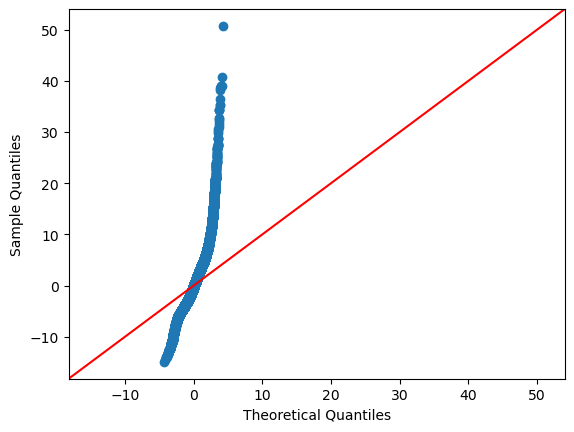

In [704]:
# Display QQ plot

import statsmodels.api as sm

sm.qqplot(y_test_residuals, line ='45')
plt.show()

Hasil dari plot QQ menunjukkan bahwa `distribusi residu cenderung tidak mengikuti distribusi normal dengan baik`.

Dari hasil visualisasi `titik-titik cenderung naik vertikal di atas 70 derajat dan tidak mendekati atau berada di garis referensi 45-derajat, menunjukkan adanya ketidaknormalan dalam distribusi residu.`

Ini dapat menandakan keberadaan outliers atau ketidakcocokan model yang mungkin perlu diperbaiki.

Hal ini mungkin bisa terjadi karena kita tidak menghandle outliers diawal dimana kita menggap outliers yang dimiliki sebagai natural outliers.

### **8.4. Assumption 4 : Homoscedasticity**

Homoskedastisitas dalam model menandakan bahwa ada error konstan sepanjang nilai variabel terikat.

Pengecekan dilakukan dengan membuat scatter plot residu terhadap variabel terikat.

Jika scatterplot menunjukkan pola acak dan tersebar merata di sekitar garis kecocokan, maka model dikatakan homoskedastik.

Varian non-konstan, yang dapat disebabkan oleh outlier atau nilai leverage ekstrim, menandakan adanya heteroskedastisitas.

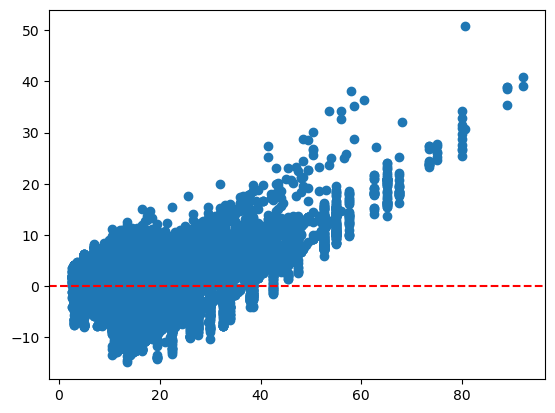

In [705]:
# Memeriksa Homoskedastisitas

# Menampilkan scatter plot antara nilai sebenarnya dan residuals untuk data uji
plt.scatter(y_test, y_test_residuals)

# Menampilkan garis referensi pada nilai residuals 0
plt.axhline(y=0, color='r', linestyle='--')

# Menampilkan plot
plt.show()

Hasil dari scatter plot menunjukkan bahwa y_test_residuals dan y_test memiliki pola linier yang cenderung linear naik meskipun padat di area bawah kiri.

Hal ini berarti `terjadi heteroskedastisitas`.

---
## **9. Model Saving**

Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Dengan melihat hasil Model Evaluation, kita akan memilih satu model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.

In [706]:
# Menyimpan File

# Import modul pickle dan json
import pickle
import json

# Menyimpan list kolom numerik ke dalam file JSON
with open('list_num_col.txt', 'w') as file_1:
  json.dump(num_col, file_1)

# Menyimpan list kolom kategorikal ke dalam file JSON
with open('list_cat_col.txt', 'w') as file_2:
  json.dump(cat_col, file_2)

# Menyimpan model scaler ke dalam file pickle
with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

# Menyimpan model encoder ke dalam file pickle
with open('model_encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

# Menyimpan model Linear Regression ke dalam file pickle
with open('model_lin_reg.pkl', 'wb') as file_5:
  pickle.dump(model_lin_reg, file_5)

---
## **10. Model Inference**

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

### **10.1. Load Model**

Pertama-tama, kita akan meload model terlebih dahulu.

In [707]:
# Memuat Model

# Membaca list kolom kategorikal dari file JSON
with open('list_cat_col.txt', 'r') as file_1:
  list_cat_col = json.load(file_1)

# Membaca list kolom numerik dari file JSON
with open('list_num_col.txt', 'r') as file_2:
  list_num_col = json.load(file_2)

# Memuat model encoder dari file pickle
with open('model_encoder.pkl', 'rb') as file_3:
  model_encoder = pickle.load(file_3)

# Memuat model scaler dari file pickle
with open('model_scaler.pkl', 'rb') as file_4:
  model_scaler = pickle.load(file_4)

# Memuat model Linear Regression dari file pickle
with open('model_lin_reg.pkl', 'rb') as file_5:
  model_lin_reg = pickle.load(file_5)

### **10.2. Inference**

Kita akan membuat data baru yang berisikan informasi yang diperlukan oleh model untuk memprediksi harga argo (price).

In [708]:
# Membuat Data Baru

# Membuat data baru dengan informasi jarak, pengali lonjakan, dan nama armada
data_inf = {
    'distance': '9',
    'surge_multiplier': 1.25,
    'name': 'Shared'
}

# Membuat DataFrame dari data baru
data_inf = pd.DataFrame([data_inf])

# Menampilkan data baru
data_inf

,distance,surge_multiplier,name
0,9,1.25,Shared


Setelah kita membuat dataFrame baru, kita pisahkan data numerical dan categorial-nya.

In [709]:
#split between numerical and categorical columns

data_inf_num = data_inf[list_num_col]
data_inf_cat = data_inf[list_cat_col]

Untuk memastikan kembali kita akan memprint masing-masing dataFrame numerical dan categorial.

In [710]:
# Menampilkan dataFrame numerical baru untuk tahap inference.
data_inf_num

,distance
0,9


In [711]:
# Menampilkan dataFrame categorical baru untuk tahap inference.
data_inf_cat

,name,surge_multiplier
0,Shared,1.25


Selanjutnya kita lakukan scaling dan encoder yang sama dengan yang diperlukan oleh Model.

In [712]:
# Penskalaan dan Encoding Fitur

# Penskalaan data numerik dari data baru menggunakan model scaler
data_inf_num_scaled = model_scaler.transform(data_inf_num)

# Encoding data kategorikal dari data baru menggunakan model encoder
data_inf_cat_encoded = model_encoder.transform(data_inf_cat)

# Menggabungkan data skala dan data terenkoding untuk data baru
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)


Selanjutnya kita akan menjalankan model kita dengan .predict()

In [713]:
# Memprediksi dengan Menggunakan Model Linear Regression

# Memprediksi target untuk data baru menggunakan model Linear Regression
y_pred_inf = model_lin_reg.predict(data_inf_final)

# Menampilkan prediksi untuk data baru
y_pred_inf

array([27.39117775])

Setelah kita lakukan kalkulasi menggunakan model prediksi linear regression, `kita peroleh hasil prediksinya yaitu 27.39117775`.

---
## **11. Pengambilan Kesimpulan**

Dalam memprediksi harga perjalanan platfor ride-hailing, saya telah membuat Model Machine Learning menggunakan Regresi Linear. 

Selama proses eksplorasi dataset, dari 57 kolom, hanya 4 kolom yang digunakan untuk model ini setelah uji korelasi, yaitu price sebagai target dan name, surge_multiplier, serta distance yang menjadi fitur ujinya. Dataset ini hanya terdiri dari data milik Uber dan Lyft. Distibusi data dari mayoritas kolom tidak normal. Saya menemukan dari tiga kolom yang menjadi fitur uji, memiliki natural outliers yang  tidak saya handle karena terjadi secara natural.

Saat kita uji model menggunakan MAE dan R2 Score, kita temukan bahwa model kita underfit relatif goodfit karena perbedaan yang sangat tipis yaitu 0.01.

Model ini mempunyai beberapa asumsi yang perlu dipenuhi agar kinerjanya baik dan valid seperti Linear Relationship, Tidak ada Multicollinearity, Multivariative Normality, dan Homoscedascity. Dari hasil ujinya kita mendapati bahwa:
- Data yang kita gunakan sebagai fitur (distance) memiliki korelai linear regresi dengan price. Namun, data surge_multiplier berbentuk cluster. Meski begitu, data tetap dimasukkan karena dianggap berhubungan.
- Data-data independet yang menjadi fitu tidak memiiki korelasi yang kuat (tidak ada multicollinearity) yang terlihat dari nilai VIF dibawah 10.
- Secara Multivariative, test ini tidak bersifat Multivariative normal karena garisnya terlalu tegak vertikal yang menandakan distribusi data variabel independennya tidak normal.
- Seacara Homoscedascity, terjadi heteroskedastisitas pada data dimana terbentuk suatu pola linear keatas kanan.

Dari hasil model analysis dengan melakukan uji coba model dengan inference, kita mendapati bahwa model bekerja dengan baik.

Kita mendapati bahwa harga awal argo adalah 3.7363876985225737. Harga argo meningkat sekitar 4.62 unit untuk setiap unit peningkatan jarak,nmeningkat sekitar 2.27 unit untuk setiap unit peningkatan faktor peningkatan, dan meningkat sekitar 4.52 unit untuk setiap unit perubahan dalam nama pengemudi.

Beberapa saran yang dapat diterapkan untuk pembuatan model selanjutnya adalah:
1. Melihat bahwa distribusi data mayoritas kolom tidak normal,bisa mencoba melakukan handling distribusi data terlebih dahulu.
2. Mengganti nama kolom agar lebih jelas dan mudah dipahami.
3. Mengatasi masalah heteroskedastisitas yang terdeteksi pada model (bisa mencakup transformasi variabel atau menggunakan metode regresi yang lebih canggih yang tahan terhadap heteroskedastisitas).
4. Mencoba model-machine learning lainnya seperti Decision Trees, Random Forest, atau model non-linear untuk melihat apakah model alternatif tersebut memberikan hasil yang lebih baik atau sesuai dengan data.
5. Memahami lebih dalam pola kluster pada data surge_multiplier dan mempertimbangkan apakah variabel ini memberikan informasi yang cukup berguna atau perlu diolah lebih lanjut.
6. Mengevaluasi apakah interpretasi variabel seperti "peningkatan sekitar 4.52 unit untuk setiap unit perubahan dalam nama pengemudi" logis dan relevan dalam konteks bisnis.